### Quiz Code

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load data
df0 = pd.read_csv('/content/features_v1')
df0 = df0.rename(columns={'Unnamed: 0': 'id'})
target = pd.read_csv("/content/target")
target = target.rename(columns={'Unnamed: 0': 'id'})
target = target.rename(columns={'NObeyesdad': 'label'})
df = pd.merge(df0, target, on='id', how='left')

print("The value count for the target variable")
df.value_counts('label') # output label is encoded in following way:
                                #'Insufficient_Weight' : 0,
                                #'Normal_Weight' : 1,
                                #'Overweight_Level_I' : 2,
                                #'Overweight_Level_II' : 3,
                                #'Obesity_Type_I' : 4,
                                #'Obesity_Type_II' : 5,
                                #'Obesity_Type_III' : 6

The value count for the target variable


label
6    4370
5    3545
1    3369
4    3261
3    2812
0    2795
2    2717
dtype: int64

In [29]:
# Split data into train, validation, and test data
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(df))
validation_size = int(validation_ratio * len(df))
test_size = len(df) - train_size - validation_size

df_train = df.sample(n=train_size, random_state=0)
df = df.drop(df_train.index)
print("\n Train \n ",df_train)

df_validation = df.sample(n=validation_size, random_state=0)
df = df.drop(df_validation.index)
print("\n Validate \n",df_validation)

df_test = df
print("\n Test \n",df_test)


 Train 
            id  Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  MTRANS       Age    Height    Weight  FCVC       NCP      CH2O       FAF       TUE        BMI  label
13386  13386       0                               1     1     2      0    0     2       3  0.166659  0.298647  0.701050   1.0  0.666667  0.335310  0.643724  0.306986  51.396422      6
322      322       0                               0     0     1      0    0     2       3  0.191489  0.566038  0.126866   1.0  0.666667  0.500000  0.666667  0.000000  18.285714      0
19301  19301       0                               1     1     0      0    0     2       3  0.191489  0.283019  0.104478   0.5  0.666667  0.500000  0.333333  0.500000  20.703125      1
4263    4263       1                               1     1     2      0    0     2       3  0.191489  0.494455  0.268657   0.5  0.666667  0.500000  0.219631  0.886231  25.587202      2
22145  22145       1                               1     1     2

In [30]:
# Define input and output
X_train = df_train.drop(['id', 'label'], axis=1)
y_train = df_train['label']
X_validation = df_validation.drop(['id', 'label'], axis=1)
y_validation = df_validation['label']
X_test = df_test.drop(['id', 'label'], axis=1)
y_test = df_test['label']

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_validation_categorical = tf.keras.utils.to_categorical(y_validation, num_classes=7)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=7)

print("Shapes of datasets:")
print("X_train shape:", X_train.shape)
print("y_train_categorical shape:", y_train_categorical.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation_categorical shape:", y_validation_categorical.shape)
print("X_test shape:", X_test.shape)
print("y_test_categorical shape:", y_test_categorical.shape)

Shapes of datasets:
X_train shape: (16008, 17)
y_train_categorical shape: (16008, 7)
X_validation shape: (3430, 17)
y_validation_categorical shape: (3430, 7)
X_test shape: (3431, 17)
y_test_categorical shape: (3431, 7)


Epoch 1/25
501/501 - 5s - loss: 0.9826 - accuracy: 0.6059 - val_loss: 0.5145 - val_accuracy: 0.8280 - 5s/epoch - 10ms/step
Epoch 2/25
501/501 - 2s - loss: 0.7320 - accuracy: 0.7056 - val_loss: 0.5328 - val_accuracy: 0.8035 - 2s/epoch - 4ms/step
Epoch 3/25
501/501 - 2s - loss: 0.6943 - accuracy: 0.7201 - val_loss: 0.4466 - val_accuracy: 0.8548 - 2s/epoch - 5ms/step
Epoch 4/25
501/501 - 2s - loss: 0.6745 - accuracy: 0.7374 - val_loss: 0.5110 - val_accuracy: 0.8055 - 2s/epoch - 3ms/step
Epoch 5/25
501/501 - 2s - loss: 0.6391 - accuracy: 0.7434 - val_loss: 0.5361 - val_accuracy: 0.8055 - 2s/epoch - 3ms/step
Epoch 6/25
501/501 - 1s - loss: 0.6493 - accuracy: 0.7448 - val_loss: 0.5234 - val_accuracy: 0.7872 - 1s/epoch - 3ms/step
Epoch 7/25
501/501 - 2s - loss: 0.6305 - accuracy: 0.7514 - val_loss: 0.4799 - val_accuracy: 0.8178 - 2s/epoch - 3ms/step
Epoch 8/25
501/501 - 2s - loss: 0.6285 - accuracy: 0.7547 - val_loss: 0.4362 - val_accuracy: 0.8376 - 2s/epoch - 4ms/step
Epoch 9/25
501/501 - 2s

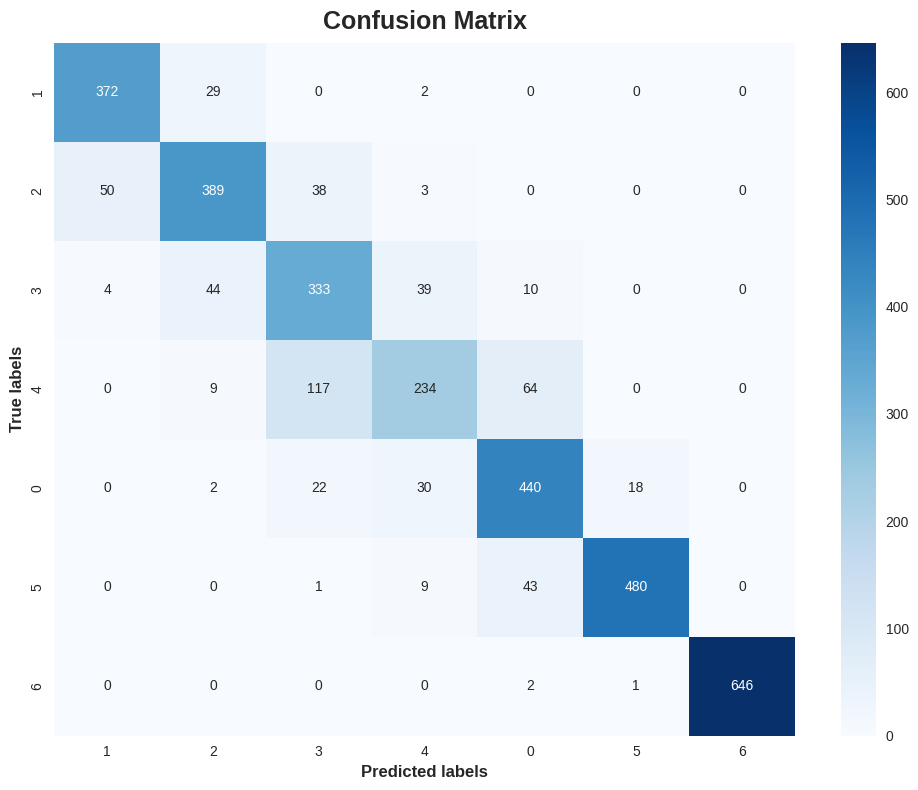

Accuracy: 0.8434858641795395
Precision: 0.8465702806350428
Recall: 0.8434858641795395


In [15]:
# Define input shape
input_shape = X_train.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # 64 neurons, ReLU activation
    BatchNormalization(),  # Batch normalization for stabilization and faster convergence
    Dropout(0.3),  # Dropout for regularization to prevent overfitting

    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),  # 64 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.3),

    Dense(7, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=25, batch_size=32, validation_data=(X_validation, y_validation_categorical), verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target['label'].unique(), yticklabels=target['label'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### No Drop Layer

Epoch 1/25
501/501 - 4s - loss: 0.6146 - accuracy: 0.7693 - val_loss: 0.5144 - val_accuracy: 0.8076 - 4s/epoch - 8ms/step
Epoch 2/25
501/501 - 1s - loss: 0.5150 - accuracy: 0.8067 - val_loss: 0.5151 - val_accuracy: 0.8012 - 1s/epoch - 3ms/step
Epoch 3/25
501/501 - 2s - loss: 0.4889 - accuracy: 0.8155 - val_loss: 0.6098 - val_accuracy: 0.7388 - 2s/epoch - 3ms/step
Epoch 4/25
501/501 - 2s - loss: 0.4771 - accuracy: 0.8194 - val_loss: 0.4381 - val_accuracy: 0.8461 - 2s/epoch - 3ms/step
Epoch 5/25
501/501 - 2s - loss: 0.4533 - accuracy: 0.8329 - val_loss: 0.4004 - val_accuracy: 0.8542 - 2s/epoch - 5ms/step
Epoch 6/25
501/501 - 4s - loss: 0.4448 - accuracy: 0.8363 - val_loss: 0.6485 - val_accuracy: 0.7586 - 4s/epoch - 8ms/step
Epoch 7/25
501/501 - 3s - loss: 0.4424 - accuracy: 0.8393 - val_loss: 0.4446 - val_accuracy: 0.8414 - 3s/epoch - 6ms/step
Epoch 8/25
501/501 - 2s - loss: 0.4329 - accuracy: 0.8451 - val_loss: 0.3809 - val_accuracy: 0.8638 - 2s/epoch - 5ms/step
Epoch 9/25
501/501 - 3s 

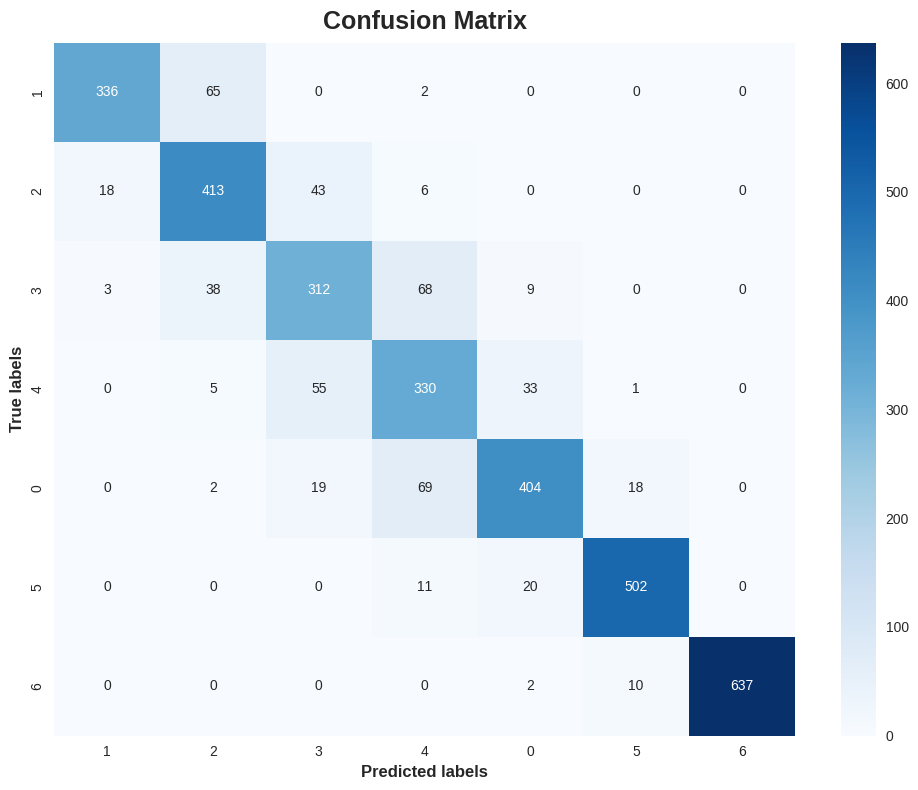

Accuracy: 0.8551442728067619
Precision: 0.8609269251263914
Recall: 0.8551442728067619


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df0 = pd.read_csv('/content/features_v1')
df0 = df0.rename(columns={'Unnamed: 0': 'id'})
target = pd.read_csv("/content/target")
target = target.rename(columns={'Unnamed: 0': 'id'})
target = target.rename(columns={'NObeyesdad': 'label'})
df = pd.merge(df0, target, on='id', how='left')

# Split data into train, validation, and test data
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(df))
validation_size = int(validation_ratio * len(df))
test_size = len(df) - train_size - validation_size

df_train = df.sample(n=train_size, random_state=0)
df = df.drop(df_train.index)

df_validation = df.sample(n=validation_size, random_state=0)
df = df.drop(df_validation.index)

df_test = df

# Define input and output
X_train = df_train.drop(['id', 'label'], axis=1)
y_train = df_train['label']
X_validation = df_validation.drop(['id', 'label'], axis=1)
y_validation = df_validation['label']
X_test = df_test.drop(['id', 'label'], axis=1)
y_test = df_test['label']

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_validation_categorical = tf.keras.utils.to_categorical(y_validation, num_classes=7)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Define input shape
input_shape = X_train.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # 64 neurons, ReLU activation
    BatchNormalization(),  # Batch normalization for stabilization and faster convergence

    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    BatchNormalization(),

    Dense(64, activation='relu'),  # 64 neurons, ReLU activation
    BatchNormalization(),

    Dense(7, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=25, batch_size=32, validation_data=(X_validation, y_validation_categorical), verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target['label'].unique(), yticklabels=target['label'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### No Normalization Layer

Epoch 1/25
501/501 - 5s - loss: 1.8223 - accuracy: 0.2722 - val_loss: 1.2154 - val_accuracy: 0.5152 - 5s/epoch - 10ms/step
Epoch 2/25
501/501 - 3s - loss: 1.1508 - accuracy: 0.5199 - val_loss: 0.8193 - val_accuracy: 0.6854 - 3s/epoch - 5ms/step
Epoch 3/25
501/501 - 1s - loss: 0.9163 - accuracy: 0.6213 - val_loss: 0.7093 - val_accuracy: 0.7233 - 1s/epoch - 2ms/step
Epoch 4/25
501/501 - 1s - loss: 0.8042 - accuracy: 0.6782 - val_loss: 0.6247 - val_accuracy: 0.7624 - 1s/epoch - 2ms/step
Epoch 5/25
501/501 - 1s - loss: 0.7280 - accuracy: 0.7121 - val_loss: 0.5727 - val_accuracy: 0.7828 - 1s/epoch - 2ms/step
Epoch 6/25
501/501 - 1s - loss: 0.6821 - accuracy: 0.7323 - val_loss: 0.5397 - val_accuracy: 0.7892 - 1s/epoch - 3ms/step
Epoch 7/25
501/501 - 1s - loss: 0.6450 - accuracy: 0.7503 - val_loss: 0.5044 - val_accuracy: 0.8000 - 1s/epoch - 3ms/step
Epoch 8/25
501/501 - 1s - loss: 0.6194 - accuracy: 0.7649 - val_loss: 0.4707 - val_accuracy: 0.8219 - 1s/epoch - 2ms/step
Epoch 9/25
501/501 - 1s

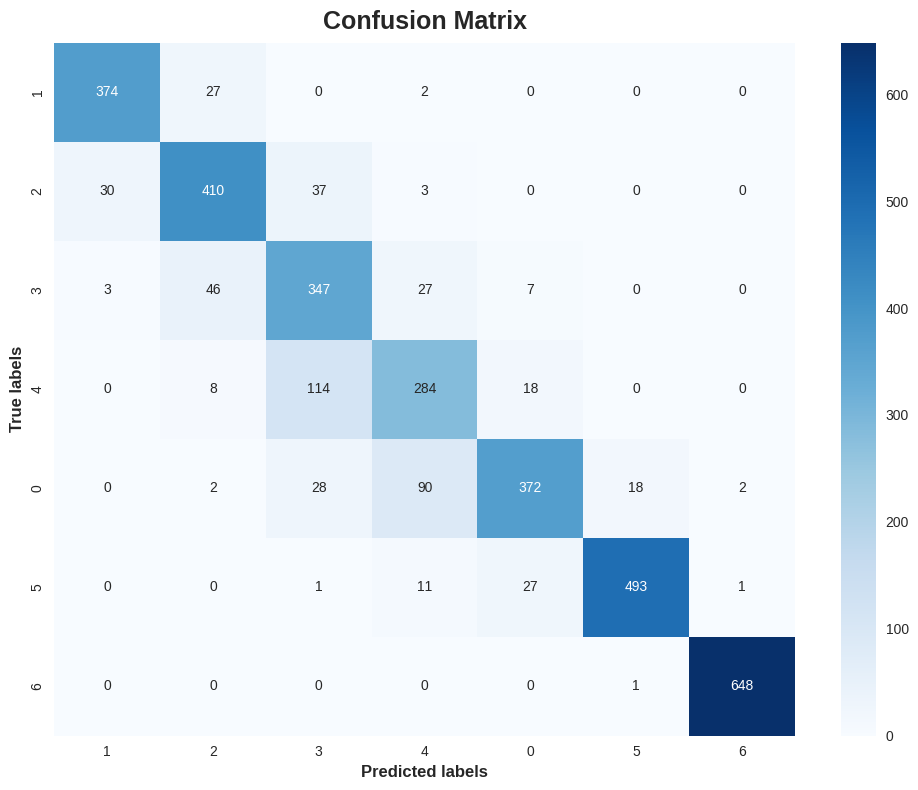

Accuracy: 0.8533955115126786
Precision: 0.8597635523360615
Recall: 0.8533955115126786


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df0 = pd.read_csv('/content/features_v1')
df0 = df0.rename(columns={'Unnamed: 0': 'id'})
target = pd.read_csv("/content/target")
target = target.rename(columns={'Unnamed: 0': 'id'})
target = target.rename(columns={'NObeyesdad': 'label'})
df = pd.merge(df0, target, on='id', how='left')

# Split data into train, validation, and test data
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(df))
validation_size = int(validation_ratio * len(df))
test_size = len(df) - train_size - validation_size

df_train = df.sample(n=train_size, random_state=0)
df = df.drop(df_train.index)

df_validation = df.sample(n=validation_size, random_state=0)
df = df.drop(df_validation.index)

df_test = df

# Define input and output
X_train = df_train.drop(['id', 'label'], axis=1)
y_train = df_train['label']
X_validation = df_validation.drop(['id', 'label'], axis=1)
y_validation = df_validation['label']
X_test = df_test.drop(['id', 'label'], axis=1)
y_test = df_test['label']

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_validation_categorical = tf.keras.utils.to_categorical(y_validation, num_classes=7)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Define input shape
input_shape = X_train.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # 64 neurons, ReLU activation
    Dropout(0.3),  # Dropout for regularization to prevent overfitting

    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    Dropout(0.4),

    Dense(64, activation='relu'),  # 64 neurons, ReLU activation
    Dropout(0.3),

    Dense(7, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=25, batch_size=32, validation_data=(X_validation, y_validation_categorical), verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target['label'].unique(), yticklabels=target['label'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### No Drop No Normalization

Epoch 1/25
501/501 - 2s - loss: 1.0795 - accuracy: 0.5690 - val_loss: 0.6933 - val_accuracy: 0.7254 - 2s/epoch - 5ms/step
Epoch 2/25
501/501 - 1s - loss: 0.6110 - accuracy: 0.7692 - val_loss: 0.5198 - val_accuracy: 0.8146 - 1s/epoch - 3ms/step
Epoch 3/25
501/501 - 2s - loss: 0.5079 - accuracy: 0.8216 - val_loss: 0.4811 - val_accuracy: 0.8283 - 2s/epoch - 3ms/step
Epoch 4/25
501/501 - 2s - loss: 0.4765 - accuracy: 0.8329 - val_loss: 0.4576 - val_accuracy: 0.8408 - 2s/epoch - 3ms/step
Epoch 5/25
501/501 - 2s - loss: 0.4589 - accuracy: 0.8370 - val_loss: 0.4259 - val_accuracy: 0.8429 - 2s/epoch - 5ms/step
Epoch 6/25
501/501 - 2s - loss: 0.4395 - accuracy: 0.8458 - val_loss: 0.4116 - val_accuracy: 0.8554 - 2s/epoch - 4ms/step
Epoch 7/25
501/501 - 2s - loss: 0.4381 - accuracy: 0.8481 - val_loss: 0.4310 - val_accuracy: 0.8519 - 2s/epoch - 4ms/step
Epoch 8/25
501/501 - 2s - loss: 0.4309 - accuracy: 0.8485 - val_loss: 0.4139 - val_accuracy: 0.8551 - 2s/epoch - 3ms/step
Epoch 9/25
501/501 - 2s 

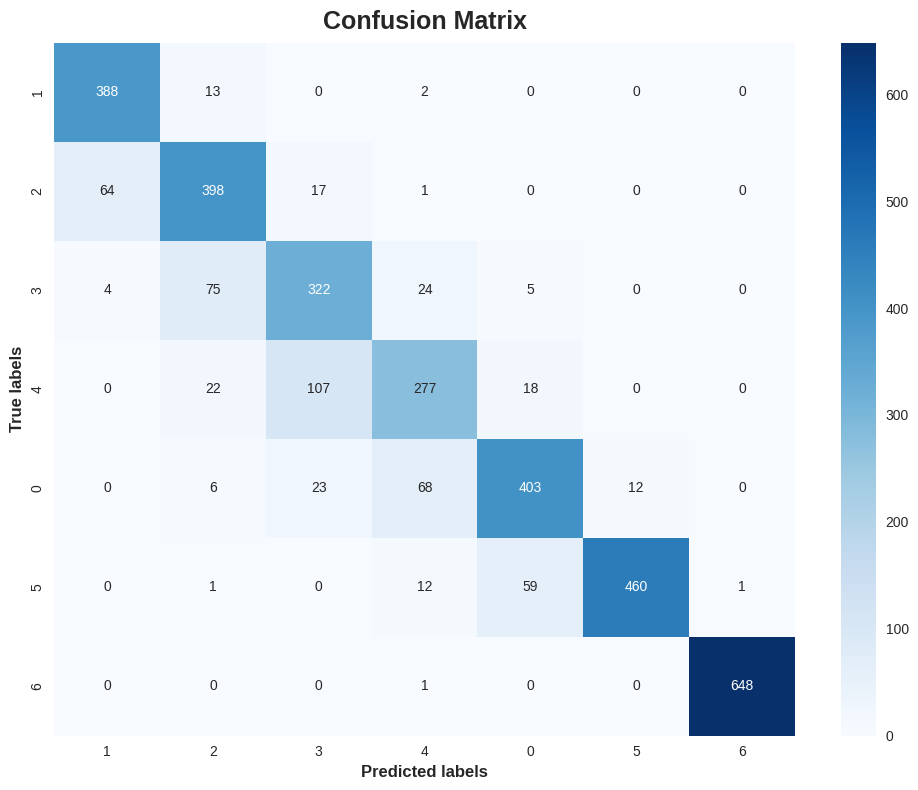

Accuracy: 0.8440687846109006
Precision: 0.8472814893699007
Recall: 0.8440687846109006


In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df0 = pd.read_csv('/content/features_v1')
df0 = df0.rename(columns={'Unnamed: 0': 'id'})
target = pd.read_csv("/content/target")
target = target.rename(columns={'Unnamed: 0': 'id'})
target = target.rename(columns={'NObeyesdad': 'label'})
df = pd.merge(df0, target, on='id', how='left')

# Split data into train, validation, and test data
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(df))
validation_size = int(validation_ratio * len(df))
test_size = len(df) - train_size - validation_size

df_train = df.sample(n=train_size, random_state=0)
df = df.drop(df_train.index)

df_validation = df.sample(n=validation_size, random_state=0)
df = df.drop(df_validation.index)

df_test = df

# Define input and output
X_train = df_train.drop(['id', 'label'], axis=1)
y_train = df_train['label']
X_validation = df_validation.drop(['id', 'label'], axis=1)
y_validation = df_validation['label']
X_test = df_test.drop(['id', 'label'], axis=1)
y_test = df_test['label']

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_validation_categorical = tf.keras.utils.to_categorical(y_validation, num_classes=7)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Define input shape
input_shape = X_train.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # 64 neurons, ReLU activation
    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # 64 neurons, ReLU activation
    Dense(7, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=25, batch_size=32, validation_data=(X_validation, y_validation_categorical), verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target['label'].unique(), yticklabels=target['label'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### 50 Epoch

Epoch 1/50
501/501 - 5s - loss: 0.9819 - accuracy: 0.6094 - val_loss: 0.5227 - val_accuracy: 0.8187 - 5s/epoch - 9ms/step
Epoch 2/50
501/501 - 2s - loss: 0.7485 - accuracy: 0.6990 - val_loss: 0.5160 - val_accuracy: 0.8160 - 2s/epoch - 5ms/step
Epoch 3/50
501/501 - 2s - loss: 0.6831 - accuracy: 0.7276 - val_loss: 0.4559 - val_accuracy: 0.8341 - 2s/epoch - 4ms/step
Epoch 4/50
501/501 - 2s - loss: 0.6563 - accuracy: 0.7416 - val_loss: 0.4433 - val_accuracy: 0.8370 - 2s/epoch - 4ms/step
Epoch 5/50
501/501 - 2s - loss: 0.6319 - accuracy: 0.7482 - val_loss: 0.4551 - val_accuracy: 0.8329 - 2s/epoch - 3ms/step
Epoch 6/50
501/501 - 2s - loss: 0.6429 - accuracy: 0.7448 - val_loss: 0.4355 - val_accuracy: 0.8464 - 2s/epoch - 4ms/step
Epoch 7/50
501/501 - 2s - loss: 0.6305 - accuracy: 0.7540 - val_loss: 0.4300 - val_accuracy: 0.8464 - 2s/epoch - 3ms/step
Epoch 8/50
501/501 - 3s - loss: 0.6216 - accuracy: 0.7581 - val_loss: 0.4290 - val_accuracy: 0.8522 - 3s/epoch - 5ms/step
Epoch 9/50
501/501 - 2s 

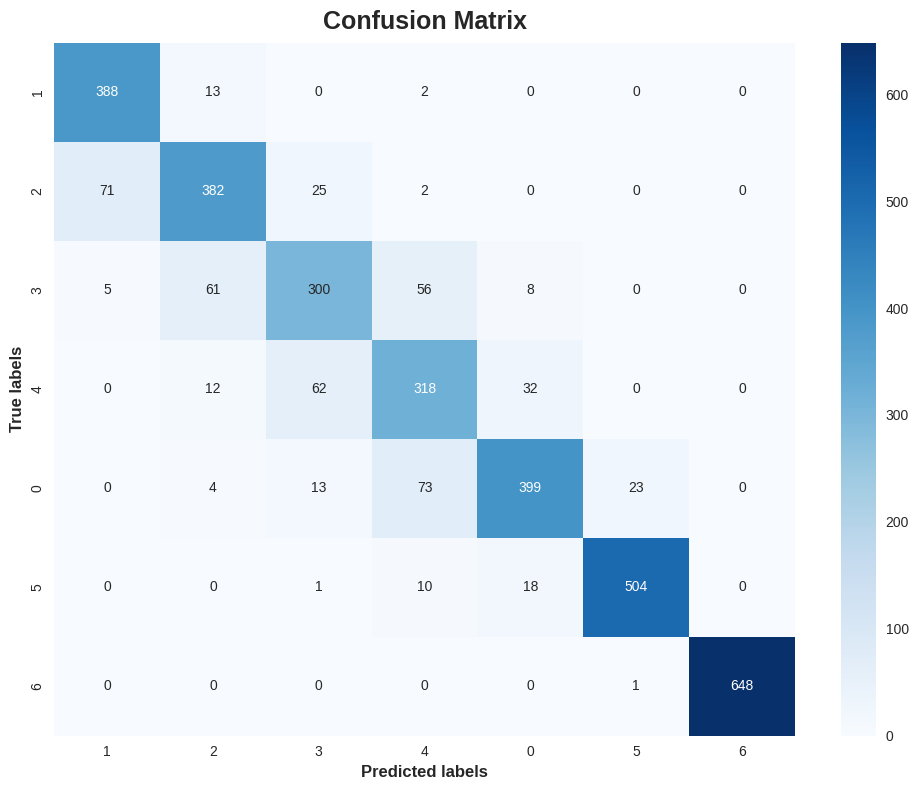

Accuracy: 0.8566015738851647
Precision: 0.8581845993979486
Recall: 0.8566015738851647


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df0 = pd.read_csv('/content/features_v1')
df0 = df0.rename(columns={'Unnamed: 0': 'id'})
target = pd.read_csv("/content/target")
target = target.rename(columns={'Unnamed: 0': 'id'})
target = target.rename(columns={'NObeyesdad': 'label'})
df = pd.merge(df0, target, on='id', how='left')

# Split data into train, validation, and test data
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(df))
validation_size = int(validation_ratio * len(df))
test_size = len(df) - train_size - validation_size

df_train = df.sample(n=train_size, random_state=0)
df = df.drop(df_train.index)

df_validation = df.sample(n=validation_size, random_state=0)
df = df.drop(df_validation.index)

df_test = df

# Define input and output
X_train = df_train.drop(['id', 'label'], axis=1)
y_train = df_train['label']
X_validation = df_validation.drop(['id', 'label'], axis=1)
y_validation = df_validation['label']
X_test = df_test.drop(['id', 'label'], axis=1)
y_test = df_test['label']

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_validation_categorical = tf.keras.utils.to_categorical(y_validation, num_classes=7)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Define input shape
input_shape = X_train.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # 64 neurons, ReLU activation
    BatchNormalization(),  # Batch normalization for stabilization and faster convergence
    Dropout(0.3),  # Dropout for regularization to prevent overfitting

    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),  # 64 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.3),

    Dense(7, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_validation, y_validation_categorical), verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target['label'].unique(), yticklabels=target['label'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### More Layers and Neurons

Epoch 1/50
501/501 - 8s - loss: 1.0889 - accuracy: 0.5618 - val_loss: 0.5417 - val_accuracy: 0.8236 - 8s/epoch - 16ms/step
Epoch 2/50
501/501 - 2s - loss: 0.8168 - accuracy: 0.6629 - val_loss: 0.5247 - val_accuracy: 0.8178 - 2s/epoch - 4ms/step
Epoch 3/50
501/501 - 3s - loss: 0.7564 - accuracy: 0.6894 - val_loss: 0.5193 - val_accuracy: 0.7980 - 3s/epoch - 5ms/step
Epoch 4/50
501/501 - 3s - loss: 0.7143 - accuracy: 0.7135 - val_loss: 0.5023 - val_accuracy: 0.8219 - 3s/epoch - 5ms/step
Epoch 5/50
501/501 - 4s - loss: 0.7158 - accuracy: 0.7089 - val_loss: 0.4615 - val_accuracy: 0.8504 - 4s/epoch - 7ms/step
Epoch 6/50
501/501 - 3s - loss: 0.6979 - accuracy: 0.7215 - val_loss: 0.4712 - val_accuracy: 0.8417 - 3s/epoch - 7ms/step
Epoch 7/50
501/501 - 3s - loss: 0.6867 - accuracy: 0.7321 - val_loss: 0.4732 - val_accuracy: 0.8397 - 3s/epoch - 5ms/step
Epoch 8/50
501/501 - 2s - loss: 0.6744 - accuracy: 0.7337 - val_loss: 0.5935 - val_accuracy: 0.7898 - 2s/epoch - 4ms/step
Epoch 9/50
501/501 - 3s

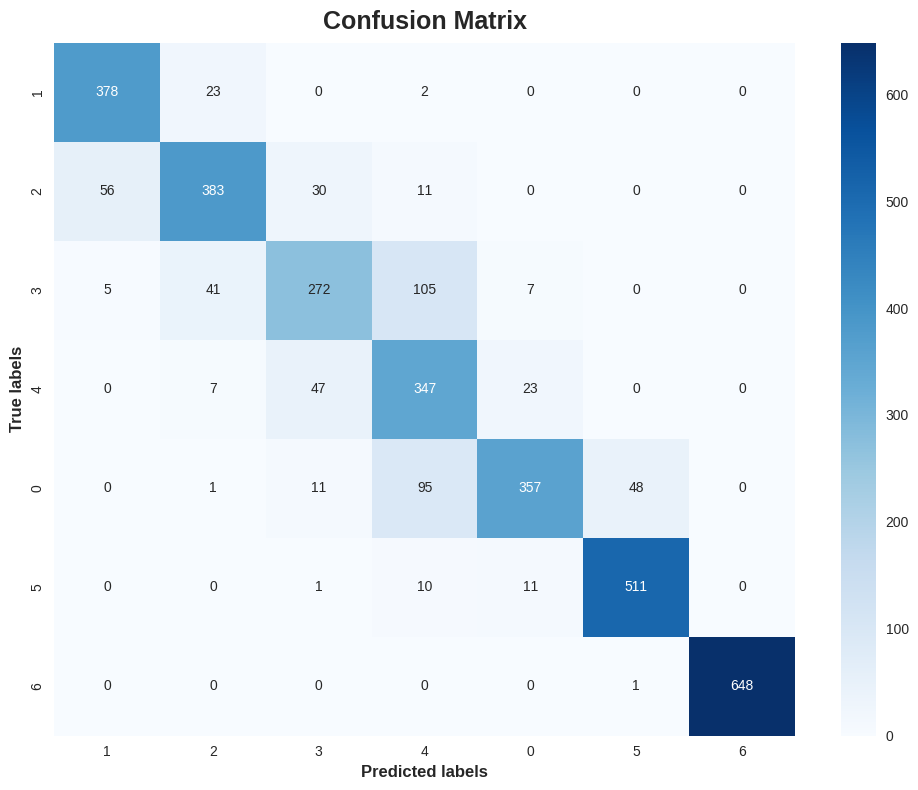

Accuracy: 0.8440687846109006
Precision: 0.8533294180322133
Recall: 0.8440687846109006


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df0 = pd.read_csv('/content/features_v1')
df0 = df0.rename(columns={'Unnamed: 0': 'id'})
target = pd.read_csv("/content/target")
target = target.rename(columns={'Unnamed: 0': 'id'})
target = target.rename(columns={'NObeyesdad': 'label'})
df = pd.merge(df0, target, on='id', how='left')

# Split data into train, validation, and test data
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * len(df))
validation_size = int(validation_ratio * len(df))
test_size = len(df) - train_size - validation_size

df_train = df.sample(n=train_size, random_state=0)
df = df.drop(df_train.index)

df_validation = df.sample(n=validation_size, random_state=0)
df = df.drop(df_validation.index)

df_test = df

# Define input and output
X_train = df_train.drop(['id', 'label'], axis=1)
y_train = df_train['label']
X_validation = df_validation.drop(['id', 'label'], axis=1)
y_validation = df_validation['label']
X_test = df_test.drop(['id', 'label'], axis=1)
y_test = df_test['label']

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_validation_categorical = tf.keras.utils.to_categorical(y_validation, num_classes=7)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Define input shape
input_shape = X_train.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # 64 neurons, ReLU activation
    BatchNormalization(),  # Batch normalization for stabilization and faster convergence
    Dropout(0.4),  # Dropout for regularization to prevent overfitting

    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),  # 64 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    BatchNormalization(),
    Dropout(0.3),

    Dense(7, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_validation, y_validation_categorical), verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target['label'].unique(), yticklabels=target['label'].unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)